# Titanic

In [1]:
# data manipulation
import pandas as pd
import numpy
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import graphviz

# sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import export_graphviz

## Load Data

In [2]:
###  load 3 csv's
testData = pd.read_csv("~/titanic/data/test.csv");
trainingData = pd.read_csv("~/titanic/data/train.csv");
genderData = pd.read_csv("~/titanic/data/gender_submission.csv");
combine = [trainingData, testData]

## Summarize Data

In [3]:
trainingData.info()
print('_'*40)
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [4]:
trainingData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
trainingData.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Long, Mr. Milton Clyde",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [6]:
trainingData[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [7]:
trainingData[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [8]:
trainingData[["SibSp", "Survived"]].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [9]:
trainingData[["Parch", "Survived"]].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [10]:
#  map Sex to binary variables
trainingData['Sex'] = trainingData['Sex'].replace({'male': 0, 'female': 1})
trainingData.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [11]:
## . populate NaN Ages with median (28)
trainingData.loc[trainingData['Age'].isnull(), 'Age'] = trainingData['Age'].median()

In [12]:
# . define 5 age buckets
# 0-19: 0
# 19-35: 1
# 35-50: 2
# 50-65: 3
# 65-100: 4

# . map to 5 buckets
trainingData.loc[(trainingData['Age'] >= 0) & (trainingData['Age'] < 19), 'Age'] = 0
trainingData.loc[(trainingData['Age'] >= 1) & (trainingData['Age'] < 35), 'Age'] = 1
trainingData.loc[(trainingData['Age'] >= 2) & (trainingData['Age'] < 50), 'Age'] = 2
trainingData.loc[(trainingData['Age'] >= 3) & (trainingData['Age'] < 65), 'Age'] = 3
trainingData.loc[(trainingData['Age'] >= 4) & (trainingData['Age'] < 1000000), 'Age'] = 4

In [13]:
#  fill NaN Embarked values with the most frequent port
trainingData.loc[trainingData.isnull().any(axis=1), 'Embarked'] = 'S'

#  map Embarked values to classes (0,1,2)
trainingData['Embarked'] = trainingData['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [14]:
## insert median into NaN Fare values
trainingData.loc[trainingData['Fare'].isnull(), ['Fare']] = trainingData['Fare'].median()

In [15]:
## likert scale for fare
trainingData['Fare'].describe()

# fare buckets (20 percent quantiles)
# 0-8
# 8-14
# 14-31
# 31-5000

trainingData.loc[(trainingData['Fare'] >= 0) & (trainingData['Fare'] < 8), 'Fare'] = 0
trainingData.loc[(trainingData['Fare'] >= 1) & (trainingData['Fare'] < 14), 'Fare'] = 1
trainingData.loc[(trainingData['Fare'] >= 2) & (trainingData['Fare'] < 31), 'Fare'] = 2
trainingData.loc[(trainingData['Fare'] >= 3) & (trainingData['Fare'] < 5000), 'Fare'] = 3

In [16]:
trainingData.drop(columns=['Ticket','Name','Cabin'], inplace=True)

In [17]:
trainingData['Fare'] = trainingData['Fare'].astype(int)
trainingData['Age'] = trainingData['Age'].astype(int)

In [18]:
trainingData.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,1,0,0,0
1,2,1,1,1,2,1,0,3,1
2,3,1,3,1,1,0,0,0,0
3,4,1,1,1,2,1,0,3,0
4,5,0,3,0,2,0,0,1,0


## Prepare Test Data (same steps as training data)

In [19]:
#  map Sex to binary variables
testData['Sex'] = testData['Sex'].replace({'male': 0, 'female': 1})

## . populate NaN Ages with median (28)
testData.loc[testData['Age'].isnull(), 'Age'] = testData['Age'].median()

# . map to 5 buckets
testData.loc[(testData['Age'] >= 0) & (testData['Age'] < 19), 'Age'] = 0
testData.loc[(testData['Age'] >= 1) & (testData['Age'] < 35), 'Age'] = 1
testData.loc[(testData['Age'] >= 2) & (testData['Age'] < 50), 'Age'] = 2
testData.loc[(testData['Age'] >= 3) & (testData['Age'] < 65), 'Age'] = 3
testData.loc[(testData['Age'] >= 4) & (testData['Age'] < 1000000), 'Age'] = 4

#  fill NaN Embarked values with the most frequent port
testData.loc[testData.isnull().any(axis=1), 'Embarked'] = 'S'

#  map Embarked values to classes (0,1,2)
testData['Embarked'] = testData['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

## insert median into NaN Fare values
testData.loc[testData['Fare'].isnull(), ['Fare']] = testData['Fare'].median()

testData.loc[(testData['Fare'] >= 0) & (testData['Fare'] < 8), 'Fare'] = 0
testData.loc[(testData['Fare'] >= 1) & (testData['Fare'] < 14), 'Fare'] = 1
testData.loc[(testData['Fare'] >= 2) & (testData['Fare'] < 31), 'Fare'] = 2
testData.loc[(testData['Fare'] >= 3) & (testData['Fare'] < 5000), 'Fare'] = 3

testData.drop(columns=['Ticket','Name','Cabin'], inplace=True)

testData['Fare'] = testData['Fare'].astype(int)
testData['Age'] = testData['Age'].astype(int)

In [20]:
testData.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [21]:
trainingData.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

## Data Cleanup

In [22]:
X = trainingData.drop(['Survived', 'PassengerId'], axis=1).to_numpy()
y = trainingData['Survived'].to_numpy()

## Decision Tree

In [23]:
dTree = DecisionTreeClassifier(max_depth=5)

In [24]:
dTree = dTree.fit(X, y)

In [25]:
dTree.score(X, y)

0.8327721661054994

In [26]:
pd.DataFrame(dTree.predict(testData.drop(['PassengerId'], axis=1))).to_csv("~/titanic/decisionTree_submission.csv")

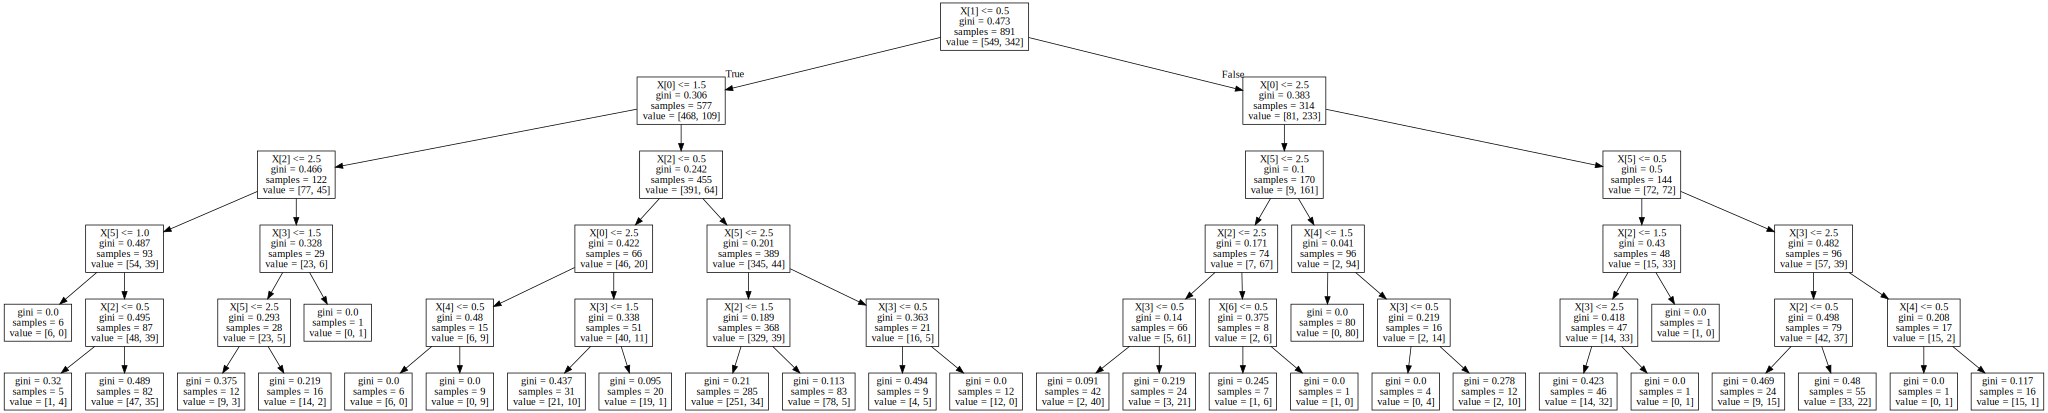

In [27]:
from sklearn.tree import export_graphviz

export_graphviz(dTree, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Random Forest

In [28]:
rfc = RandomForestClassifier(max_depth=5, n_estimators=10)
rfc = rfc.fit(X, y)

In [29]:
rfc.score(X, y)

0.8282828282828283

In [30]:
testData['Survived'] = rfc.predict(testData.drop(['PassengerId'], axis=1))

In [31]:
testData[['PassengerId', 'Survived']]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [32]:
genderData[['aaa','bbb']] = testData[['PassengerId', 'Survived']]
genderData

,PassengerId,Survived,aaa,bbb
0,892,0,892,0
1,893,1,893,0
2,894,0,894,0
3,895,0,895,0
4,896,1,896,1
5,897,0,897,0
6,898,1,898,1
7,899,0,899,0
8,900,1,900,1
9,901,0,901,0


In [34]:
pd.DataFrame(testData[['PassengerId', 'Survived']]).to_csv("~/titanic/rf_submission.csv", index=False)